# Assignment number 2 

### 1. Perform a PCA, analysing the meaning of the first two principal components using the “circle of correlations”

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
!ls -lrt

total 64
-rwxr-xr-x@ 1 luchino_prince  staff  11462 Oct  8 15:58 wines_properties.csv
-rwxr-xr-x@ 1 luchino_prince  staff  19361 Oct  8 15:58 ass2.pdf


In [67]:
%cd ./Assignment_2
!ls -lrt

[Errno 2] No such file or directory: './Assignment_2'
/Users/luchino_prince/Desktop/statistics/Assignment_2
total 64
-rwxr-xr-x@ 1 luchino_prince  staff  11462 Oct  8 15:58 wines_properties.csv
-rwxr-xr-x@ 1 luchino_prince  staff  19361 Oct  8 15:58 ass2.pdf


In [68]:
wine = pd.read_csv("wines_properties.csv")

In [69]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [70]:
#Dropping missing values 
wine.dropna(how = "all", inplace = True)

In [71]:
#Dropping the Qualitative data 
wine2 = wine.iloc[:,0:13]

In [72]:
wine2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [108]:
#standardizing
wine_s = StandardScaler().fit_transform(wine2)

In [74]:
# getting eigenvectors and eigenvalues
mean_vector = np.mean(wine_s, axis = 0)
N = wine_s.shape[0]
covariance_matrix = (wine_s - mean_vector).T.dot((wine_s - mean_vector)) / (N - 1)
covariance_matrix

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

In [75]:
# the same as above.
np.cov(wine_s.T)

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

In [76]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [77]:
eigen_values

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.10396199, 0.35046627, 0.16972374,
       0.29051203, 0.22706428, 0.25232001])

In [78]:
eigen_vectors

array([[-0.1443294 ,  0.48365155, -0.20738262,  0.0178563 , -0.26566365,
         0.21353865,  0.05639636, -0.01496997,  0.39613926, -0.26628645,
        -0.50861912, -0.22591696,  0.21160473],
       [ 0.24518758,  0.22493093,  0.08901289, -0.53689028,  0.03521363,
         0.53681385, -0.42052391, -0.02596375,  0.06582674,  0.12169604,
         0.07528304,  0.07648554, -0.30907994],
       [ 0.00205106,  0.31606881,  0.6262239 ,  0.21417556, -0.14302547,
         0.15447466,  0.14917061,  0.14121803, -0.17026002, -0.04962237,
         0.30769445, -0.49869142, -0.02712539],
       [ 0.23932041, -0.0105905 ,  0.61208035, -0.06085941,  0.06610294,
        -0.10082451,  0.28696914, -0.09168285,  0.42797018, -0.05574287,
        -0.20044931,  0.47931378,  0.05279942],
       [-0.14199204,  0.299634  ,  0.13075693,  0.35179658,  0.72704851,
         0.03814394, -0.3228833 , -0.05677422, -0.15636143,  0.06222011,
        -0.27140257,  0.07128891,  0.06787022],
       [-0.39466085,  0.065039

In [79]:
# Correlation matrix
correlation_matrix = np.corrcoef(wine_s.T)
pd.DataFrame(correlation_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [80]:
eigen_values_corr, eigen_vectors_corr = np.linalg.eig(correlation_matrix)

In [81]:
eigen_values_corr

array([4.70585025, 2.49697373, 1.44607197, 0.91897392, 0.85322818,
       0.64165703, 0.55102831, 0.10337794, 0.34849736, 0.16877023,
       0.28887994, 0.22578864, 0.25090248])

In [82]:
eigen_vectors_corr

array([[-0.1443294 ,  0.48365155, -0.20738262,  0.0178563 , -0.26566365,
         0.21353865,  0.05639636, -0.01496997,  0.39613926, -0.26628645,
        -0.50861912, -0.22591696,  0.21160473],
       [ 0.24518758,  0.22493093,  0.08901289, -0.53689028,  0.03521363,
         0.53681385, -0.42052391, -0.02596375,  0.06582674,  0.12169604,
         0.07528304,  0.07648554, -0.30907994],
       [ 0.00205106,  0.31606881,  0.6262239 ,  0.21417556, -0.14302547,
         0.15447466,  0.14917061,  0.14121803, -0.17026002, -0.04962237,
         0.30769445, -0.49869142, -0.02712539],
       [ 0.23932041, -0.0105905 ,  0.61208035, -0.06085941,  0.06610294,
        -0.10082451,  0.28696914, -0.09168285,  0.42797018, -0.05574287,
        -0.20044931,  0.47931378,  0.05279942],
       [-0.14199204,  0.299634  ,  0.13075693,  0.35179658,  0.72704851,
         0.03814394, -0.3228833 , -0.05677422, -0.15636143,  0.06222011,
        -0.27140257,  0.07128891,  0.06787022],
       [-0.39466085,  0.065039

In [83]:
u, s, v = np.linalg.svd(wine_s.T)

In [84]:
pd.DataFrame(u)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.144329,-0.483652,0.207383,-0.017856,-0.265664,0.213539,-0.056396,0.396139,-0.508619,0.211605,-0.225917,0.266286,-0.014970
1,0.245188,-0.224931,-0.089013,0.536890,0.035214,0.536814,0.420524,0.065827,0.075283,-0.309080,0.076486,-0.121696,-0.025964
2,0.002051,-0.316069,-0.626224,-0.214176,-0.143025,0.154475,-0.149171,-0.170260,0.307694,-0.027125,-0.498691,0.049622,0.141218
3,0.239320,0.010591,-0.612080,0.060859,0.066103,-0.100825,-0.286969,0.427970,-0.200449,0.052799,0.479314,0.055743,-0.091683
4,-0.141992,-0.299634,-0.130757,-0.351797,0.727049,0.038144,0.322883,-0.156361,-0.271403,0.067870,0.071289,-0.062220,-0.056774
5,-0.394661,-0.065040,-0.146179,0.198068,-0.149318,-0.084122,-0.027925,-0.405934,-0.286035,-0.320131,0.304341,0.303882,0.463908
6,-0.422934,0.003360,-0.150682,0.152295,-0.109026,-0.018920,-0.060685,-0.187245,-0.049578,-0.163151,-0.025694,0.042899,-0.832257
7,0.298533,-0.028779,-0.170368,-0.203301,-0.500703,-0.258594,0.595447,-0.233285,-0.195501,0.215535,0.116896,-0.042352,-0.114040
8,-0.313429,-0.039302,-0.149454,0.399057,0.136860,-0.533795,0.372139,0.368227,0.209145,0.134184,-0.237363,0.095553,0.116917
9,0.088617,-0.529996,0.137306,0.065926,-0.076437,-0.418644,-0.227712,-0.033797,-0.056218,-0.290775,0.031839,-0.604222,0.011993


***CHOOSING THE NUMBER OF COMPONETS***

In [85]:
# how to explain the variance--> using eigen values
tot_eig_vals = sum(eigen_values)
tot_eig_vals

13.073446327683627

In [86]:
eigen_values

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.10396199, 0.35046627, 0.16972374,
       0.29051203, 0.22706428, 0.25232001])

In [87]:
sorted_eigenvalues = sorted(eigen_values, reverse=True)
sorted_eigenvalues

[4.732436977583593,
 2.5110809296451224,
 1.454241867846469,
 0.9241658668248741,
 0.8580486765371109,
 0.6452822124678539,
 0.5541414662457841,
 0.3504662749462547,
 0.29051203269397685,
 0.2523200103608253,
 0.22706428173088525,
 0.16972373898012144,
 0.10396199182075298]

In [88]:
# return a list of the variance explain by each component
variance_explained = [(i / tot_eig_vals)*100 for i in sorted_eigenvalues]
variance_explained

[36.19884809992633,
 19.207490257008917,
 11.12363053624999,
 7.069030182714027,
 6.563293679648597,
 4.9358233192225605,
 4.238679322623323,
 2.680748948378869,
 2.2221534047897085,
 1.930019093944081,
 1.736835689989916,
 1.2982325756042123,
 0.7952148898994496]

In [89]:
# somma culmulativa
np.cumsum(variance_explained)

array([ 36.1988481 ,  55.40633836,  66.52996889,  73.59899908,
        80.16229276,  85.09811607,  89.3367954 ,  92.01754435,
        94.23969775,  96.16971684,  97.90655253,  99.20478511,
       100.        ])

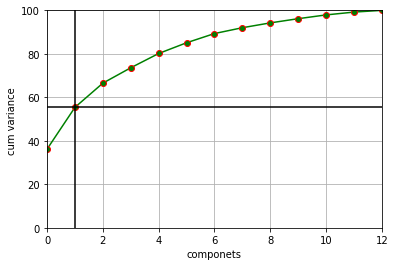

In [90]:
plt.plot(np.cumsum(variance_explained), marker = "o", mec="red", color = "green")
plt.xlabel('componets')
plt.ylabel('cum variance ')

plt.savefig('hello_plot.pdf')
plt.xlim(0, 12)
plt.ylim(0, 100)

plt.axhline(y=55.40, color="black")
plt.axvline(x=1, color="black")
plt.grid()



In the graph the component are indexed from 0, so the first component is the "PC0" and the second one is the "PC1"

As we can observe from the graph, the two first principal components (PC0 and PC1) are sufficient to explain more or less the 55% of the variance.
So for our analysis we are going to use two **Principal Componets**.

**PERFORMING THE PCA USING 2 PRINCIPAL COMPONENTS**

In [91]:
my_pca = PCA(n_components=2)
new_data = my_pca.fit_transform(wine_s)
new_data

#Those are the two Principal Componets which explain the 55% of the variance
#(which are alreaded 'roteated')

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [92]:
pcs = PCA().fit(wine_s)
pcs2 = pcs.components_
pcs2

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

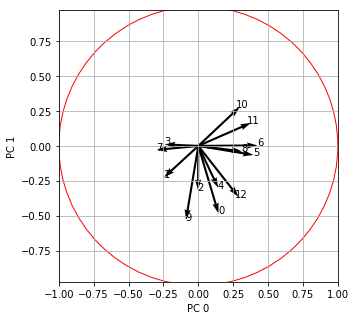

In [93]:
fig = plt.figure(figsize=(5,5))

#diverso
plt.quiver(np.zeros(pcs2.shape[1]),np.zeros(pcs2.shape[1]),
           pcs2[0,:],pcs2[1,:],
           angles='xy',scale_units='xy',scale=1)


feature_names = np.arange(pcs2.shape[1])
for i,j,z in zip(pcs2[1,:]+0.02, pcs2[0,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='r')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

# Label axes
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.grid()

DESCRPTION OF COMPONENTS:
    

### 2. Use a hierarchical cluster algorithm to guess a likely number of cluster present in the data

In [94]:
import pandas as pd 
import numpy as np
from scipy.cluster.hierarchy import linkage

In [95]:
tabella = pd.DataFrame(new_data,columns=['component1','component2'])
tabella.head()

,component1,component2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [96]:
path = linkage(tabella.values,method='complete',metric='euclidean')

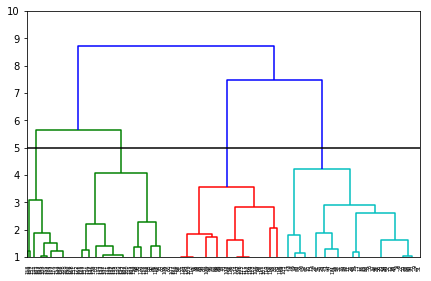

In [97]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(path)
plt.tight_layout()
plt.ylim(1, 10) #because if it starts from 0 is too confused.
plt.axhline(5, color ="black")

**4 LOOKS LIKE A PLAUSIBLE NUMBERS OF OPTIMAL CLUSTERS.**

### 3. Now we are going to perform a K-means method with 4 clusters

In [98]:
from sklearn.cluster import KMeans
k_mean=KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
clust=k_mean.fit_predict(new_data)

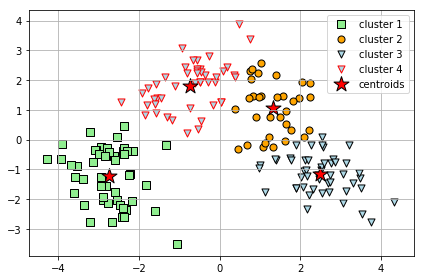

In [99]:
# cluster 1
plt.scatter(new_data[clust == 0, 0],
            new_data[clust == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
# cluster 2
plt.scatter(new_data[clust == 1, 0],
            new_data[clust == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
# cluster 3
plt.scatter(new_data[clust == 2, 0],
            new_data[clust == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
##cluster 4
plt.scatter(new_data[clust == 3, 0],
            new_data[clust == 3, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='red',
            label='cluster 4')

# centroids 
plt.scatter(k_mean.cluster_centers_[:, 0],
            k_mean.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

**Let's do the silouette analysis of the clusters**

In [100]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [101]:
lab=np.unique(clust)
n_clusters=lab.shape[0]
svals = silhouette_samples(new_data, clust, metric='euclidean')

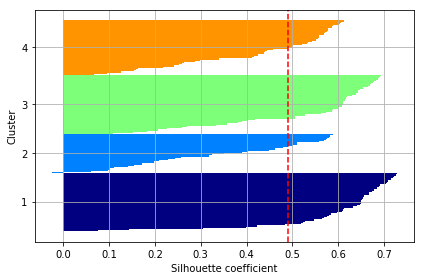

In [102]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(lab):
    c_silhouette_vals = svals[clust == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(svals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, lab + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.grid()

plt.tight_layout()
plt.show()

As we can see from the 'cluster plot' and from the Silhouette, 4 clusters do not lead to a good clustering. 
Let's check also by considering the distorsion. 

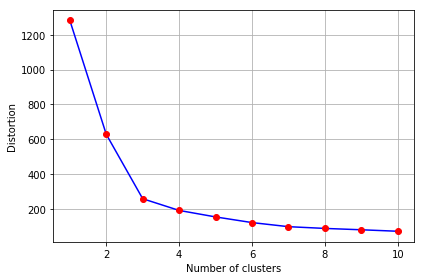

In [103]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(new_data)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o',mec="red", mfc = "red" , color = "b")
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid()
plt.tight_layout()
plt.show()


We might consider a different number of clusters,the first flattening is at 3 clusters not 4, and from there on there is a constant drop.

**Now we are going to perform a K-means method with 3 clusters**

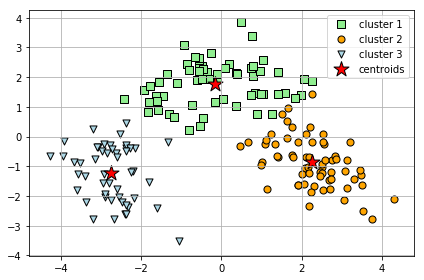

In [104]:
k_mean=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
clust=k_mean.fit_predict(new_data)

# cluster 1
plt.scatter(new_data[clust == 0, 0],
            new_data[clust == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
# cluster 2
plt.scatter(new_data[clust == 1, 0],
            new_data[clust == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
# cluster 3
plt.scatter(new_data[clust == 2, 0],
            new_data[clust == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')


# centroids 
plt.scatter(k_mean.cluster_centers_[:, 0],
            k_mean.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

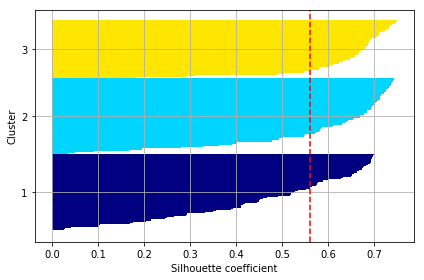

In [105]:
lab=np.unique(clust)
n_clusters=lab.shape[0]
svals = silhouette_samples(new_data, clust, metric='euclidean')


y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(lab):
    c_silhouette_vals = svals[clust == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color= color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(svals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, lab + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.grid()
plt.tight_layout()
plt.show()



Although the first cluster it's a little worse, this looks much more omogenous than before.

I want now to check how the original values are related to the centroids of the clusters, since we now that the centroid is the most representative value of each cluster .

In [106]:
k_mean.cluster_centers_

array([[-0.16278513,  1.76758824],
       [ 2.26614991, -0.86559213],
       [-2.74392982, -1.2141906 ]])

In [128]:
##wine2

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [136]:
## here i don't care about having standardized data, so i use data2

moments_by_clusters=[]
for i in range(3):
    moments_by_clusters.append((pd.DataFrame.std(wine2[clust==i]).values, pd.DataFrame.mean(wine2[clust==i]).values))
x=np.array(moments_by_clusters)

moments_total=[]
moments_total.append((pd.DataFrame.std(wine2).values, pd.DataFrame.mean(wine2).values))
                         
y=np.array(moments_total)

In [149]:
y.shape
y2=pd.DataFrame(y[0,:,:])
y2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
1,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258


In [150]:
diff1=x[0,:,:]-y
diff2=x[1,:,:]-y
diff3=x[2:,:,]-y

##remember first row is the stds, the second is the means
diff1=pd.DataFrame(diff1[0,:,:])
diff1
## the first cluster has low average levels(relative to the total average level of the data above) for the first, fourth
## and 12th component(remember to add one to these), these components also show a significant lower variance in the cluster
## than the total variance, hence these values are very concentrated around the mean in the clusters and are hence very
## important within the cluster number 1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.31199,-0.091643,0.021940,-0.323798,-0.518208,-0.122792,-0.426093,-0.003325,0.016716,-1.475144,-0.025045,-0.223468,-172.762914
1,-0.76231,-0.404964,-0.147132,0.403518,-6.910804,-0.090805,-0.040039,0.003685,-0.003207,-2.065474,0.094181,0.157545,-240.539412


In [151]:
y2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
1,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258


In [152]:
diff2=pd.DataFrame(diff2[0,:,:])
diff2
## the second cluster has low average levels(relative to the total average level) of the 7th variable with a corresponding
## lower variance, and it has high-average level wrt to the 6th, and 12th variable, both with lower average.
##Again these make these variables relevant within cluster 2.

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.237380,-0.439689,-0.027231,0.052395,-0.826058,-0.279524,-0.517036,-0.051729,-0.140815,-1.01361,-0.105065,-0.348677,-64.385234
1,0.658601,-0.360567,0.097233,-1.898069,7.570927,0.564575,0.983387,-0.071854,0.330820,0.34816,0.112238,0.545502,335.669242


In [153]:
y2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
1,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258


In [154]:
diff3=pd.DataFrame(diff3[0,:,:])
diff3
##The 3rd,7th and 9th cluster exibists high average levels for the firsts variable(with a lower of similar variance),
## we have low average values for the 5th,6th,8th and 11th variable(with lower variance).
##Again these observation make these variables relevant within cluster 3

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.286928,-0.038011,-0.090824,-1.099696,-3.313797,-0.272594,-0.686302,0.000561,-0.162353,-0.001660,-0.113121,-0.436719,-199.839005
1,0.151015,1.008141,0.068177,1.943832,-0.721165,-0.616949,-1.231310,0.088962,-0.427838,2.285175,-0.271531,-0.921481,-119.342238


### INTERPRETATION OF OUR ANALYSIS

**PC1: negatively correlated with: alcohol, ash, magnesium, color intensity and proline***
-	Alcohol represents the quantity of alcohol that a specific type of wine contains.  Alcohol itself does not allow us to understand whether the wine is high quality or not
-	Ash: ash is an indicator of mineral substances that a wine contains. Mineral substances give to a wine a specific flavor. So, the more ashes a wine contains, the more “salty” and tasteful a wine is going to be.
-	Magnesium:  More magnesium, ceteris paribus, reduces the Ph of a wine and improves taste. Thus, wines with higher magnesium concentrations will be higher quality ones. 
-	Color Intensity: Color Intensity is crucial not just because it is the most important part of the visual experience, also because it is related to many other factors included in a wine, with Ph as well. 
-	Proline: Low levels of proline means that a wine is not genuine and might have been diluted with water. White wines have slightly lower values of proline compared to red ones, but this does not mean that white wines are worse quality than red ones.
 
 *We decided to relate these variables under a Principal Component 1, which we call “Quality and Experience Component”, where with “experience” we refer to the broadest possible experience a customer can get from tasting a wine, from visual to taste experience. Since we found out that the above-mentioned variables summarize quality, and they are negatively correlated with our PC1, high values of PC1 means low values of quality and viceversa.* 


**PC0: is positively correlated with total phenols, proanthocyanins, flavonoids, and Hue.***
Polyphenols are a broad group of substances contained into wines. We found out that in general phenols are related to a wine’s Ph, but the most important thing we got is that polyphenols have strong antioxidant properties, thus they improve health. Flavonoids have positive effects on health: studies show that they are anti-cancer, anti-inflammatory and anti-allergic. Proanthocyanins are a sub-group of flavonoids and share the same healing characteristics. Red wines contain more phenols in general compared to the white ones. Hue is an indicator of the color and the shades of a wine: it is related to Ph and with the presence of phenols. 

*Thus, we decided that our PC0 should summarize variables health-related, so we’ll call our PC0 “Health Component”. Higher values in the presence of phenols, proanthocyanins and so on are related to “healthier” wines.*

**Cluster Analysis: interpretation**
Our graphical representation divides wines into three categories: cluster 1, cluster 2 and cluster 3. X-axis represents the Principal Component 0, that is “Health”, and the y-axis indicates “Quality and experience”. Higher values of PC0 are related to wines who contain more polyphenols, which are anti-inflammatory and anti-oxidant substances. Since the correlation between PC1 and variables like magnesium, ash, color and so on was negative, higher values of PC1 are associated with lower quality wines.
Thus:
-	**Cluster 1**, the green one, contains wines whose quality is, on average, lower. The quantity of polyphenols this wines have is concentrated around the mean, so they represent a quite-healthy solution. Wines which belong to this cluster are not great in terms of quality (color intensity, magnesium, proline), but, for instance, have more benefic effects than wines in cluster 1.
-	**Cluster 2**, the yellow one, seems to be the most appealing group of wine: these wines are high-quality, but they also contain the highest amount of polyphenols at all.
-	**Cluster 3**, the blue one, contains wines that have the same quality-level, on average, than cluster 2, but with definitely lower amounts of polyphenols: we can say that those are the wines with less healthy properties at all. 

*We think that our cluster analysis could be very useful to improve a customer’s purchase decision process: basing on his own preferences in terms of wine quality and health, he will be able to choose the wine more appropriate for him. If the customer is careful about healthy properties, he will choose wines inside cluster 2, or inside cluster 1 if he is more price sensitive. A customer that evaluates wine exclusively on quality and experience will choose indifferently from cluster 3 or 2: again the price or other unobserved factors could lead his choice. 
Our analysis showed that it is possible to group wines basing on healthy properties and quality, however one weak point can be the lack of critical information, especially the price. Even if price is positively correlated with quality, it would have been nice to see how the average price is different among clusters. Moreover, price is surely one of the main drivers for a lot of people when it is about buying wines. In order to extract all the value from such an analysis, both from a business and a customer perspective, we should have included leverages like price.*


### 4. Write a function that takes in input the dataset and that returns 
- 1) the value of K (for the K-means) that is associated with the best overall silhouette of the K-means algorithm and 
- 2) the plot of the correspondent clusters on the space of the first two dimensions of the PCA (performed over the same dataset).


In [64]:
from sklearn.metrics import silhouette_score

##for this exercise we suppose that we have already performed the PCA on the original data and that we are given the
## projected data, in fact as an argument we have new_data

def best_sil(new_data):
    s_score=np.zeros(len(new_data)-3)
    x=np.array([i+2 for i in range(len(new_data)-3)])
    for i in range(len(new_data)-3):
        n_clust=i+2
        k_mean=KMeans(n_clusters=n_clust,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
        clust=k_mean.fit_predict(new_data)
        s_score[i] = silhouette_score(new_data, clust, metric='euclidean')
        ##this way i get all the values, i'll plot and extrac the maximum
        ## which is the best number for the silhoutte c
        
    plt.plot(x,s_score, color = "blue")
    plt.grid()
    plt.show()
    return (s_score==s_score.max()).nonzero(),x,s_score
    ##this returns the index of the best fitting value
    ## NB: The silhoutte coefficent is defined only in 
    ## 2<=( #labels )<= #(smaples)-1 --> this is why i is in range len(new_data)-3
    ## NB: the number of optimal clusters for this criteria will be equal to (s_score==s_scoremax()).nonzero()+2
    ## this because of how we constructed the function, our case the number given back is 1, so the number of optimal
    ## clusters will be 3!
    


    
    
    

ciao


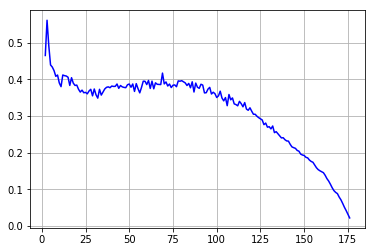

In [65]:
optimal,x,s_score=best_sil(new_data)

### 5. Write a function that takes in input the dataset: the function performs the PCA and returns the circle of correlations of each pair of principal components (1 and 2, 1 and 3, 1 and ..., 2 and 1, 2 and 3, ...). Plot all the circles in the same plot and/or in a series of plots 3x3

In [23]:
##this is the function that doesn't have the subplots

def circle_correlations_1(data):
    #drop what needed, hoping to receive only not categorical and dummy variables,with no nan and already standardized
    ## this way i can perform the PCA correctly .
    ##data.dropna(how="all",inplace=True)
    ##data2=data.iloc[:,0:13]
    ##data3=StandardScaler().fit_transform(data)
    pca=PCA().fit(data)
    pcs2=pca.components_
    for h in range(len(pcs2)):
            ##print("k è",k)
            for k in range(len(pcs2)):
                if (h<k):
                
                    ##print("il mio valore da cui parto è ",pcs2[:,k+1:].shape[1])
                    ##print("h è ",h+k+1)
                    fig = plt.figure(figsize=(5,5))

                    plt.quiver(np.zeros(pcs2.shape[1]),np.zeros(pcs2.shape[1]),pcs2[h,:],pcs2[k,:],angles='xy',scale_units='xy',scale=1)


                    feature_names = np.arange(pcs2.shape[1])
                    for i1,j1,z1 in zip(pcs2[k,:]+0.02, pcs2[h,:]+0.02, feature_names):
                        plt.text(j1, i1, z1, ha='center', va='center')

                # Add unit circle
                    circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
                    plt.gca().add_artist(circle)

                # Ensure correct aspect ratio and axis limits
                    plt.axis('equal')
                    plt.xlim([-1.0,1.0])
                    plt.ylim([-1.0,1.0])

                # Label axes
                    plt.xlabel('PC'+str(h))
                    plt.ylabel('PC'+str(k))
                    plt.grid()
                    plt.show()
    return

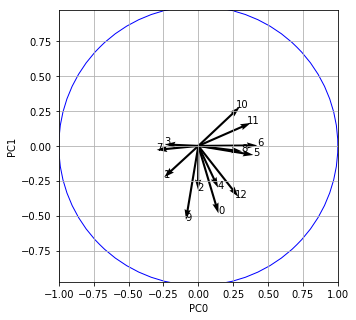

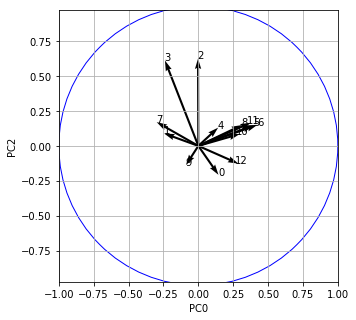

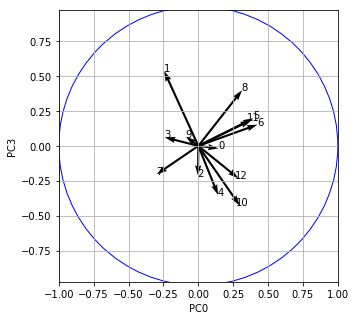

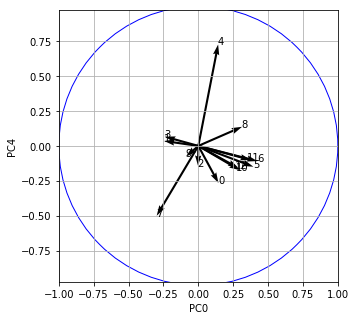

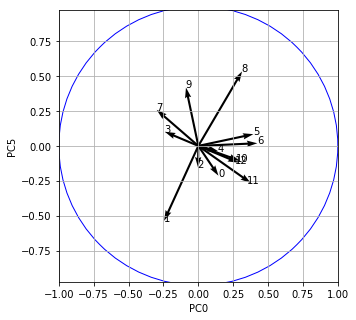

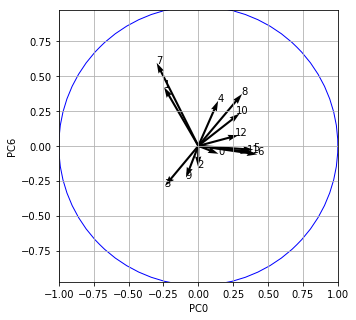

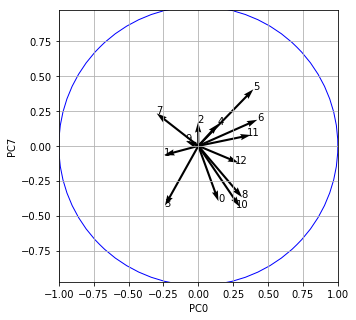

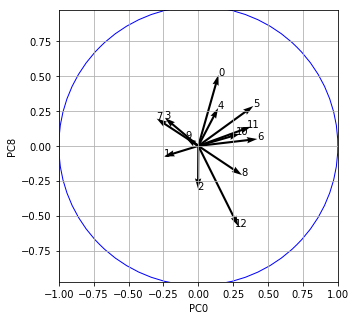

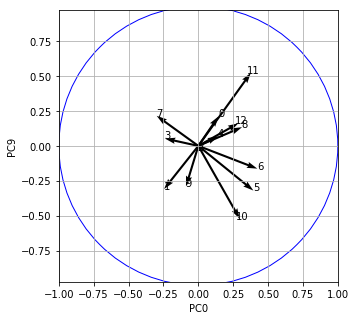

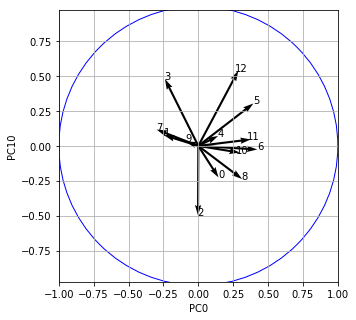

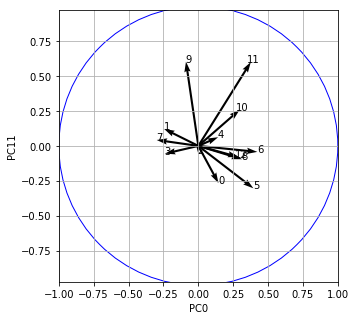

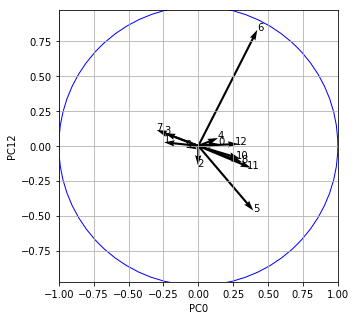

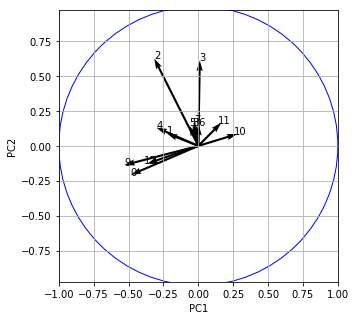

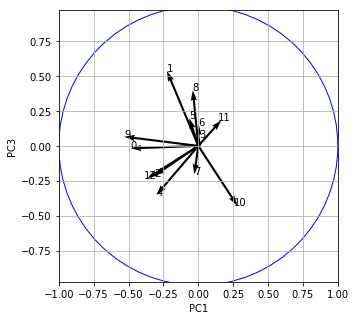

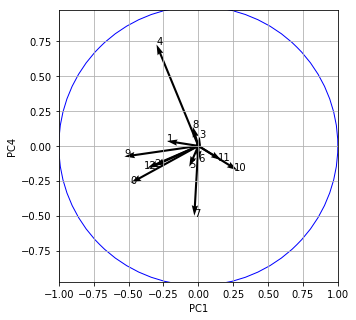

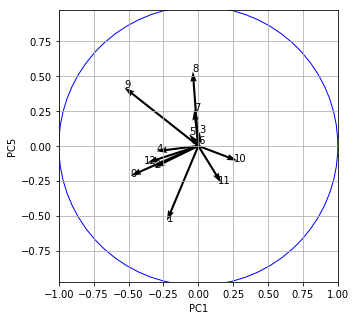

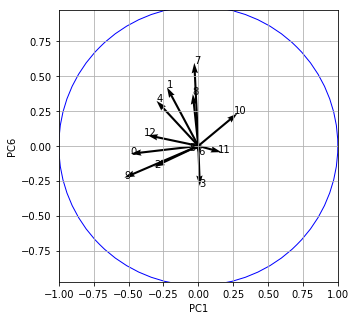

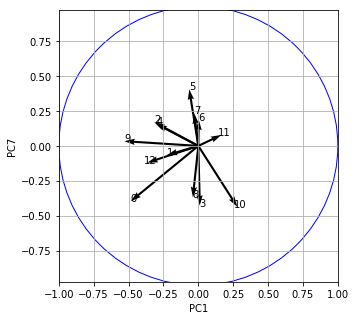

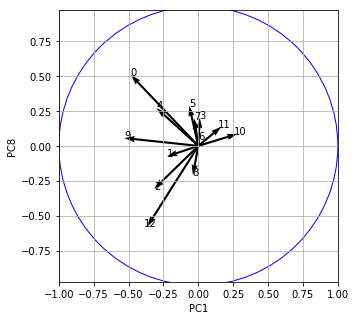

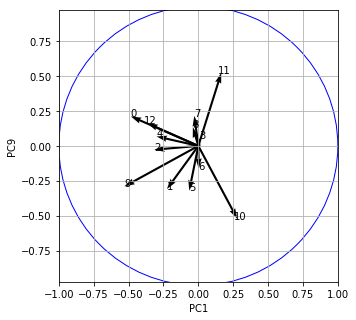

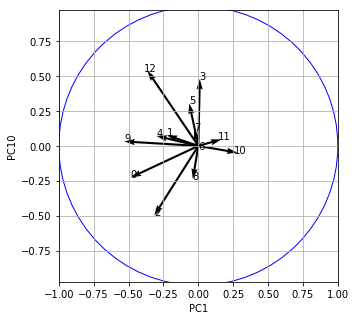

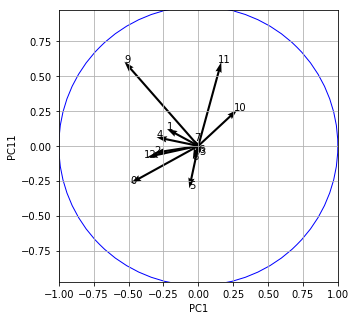

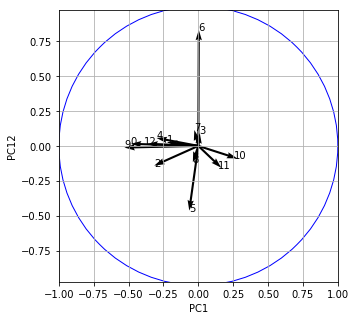

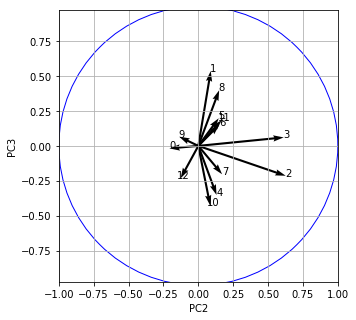

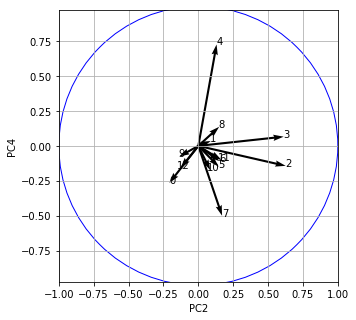

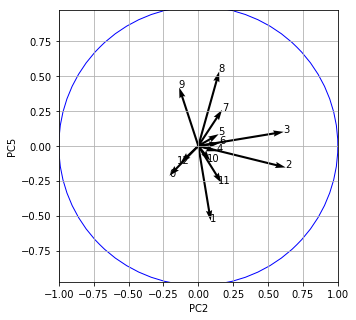

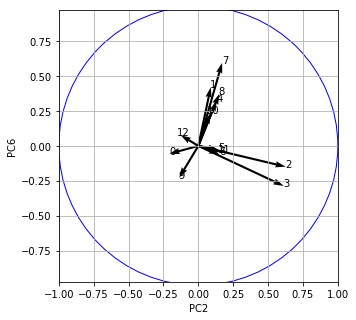

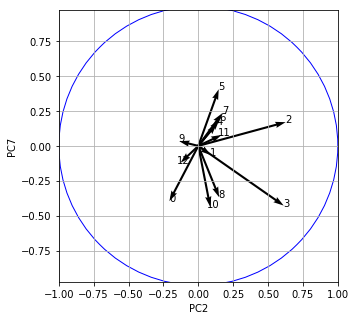

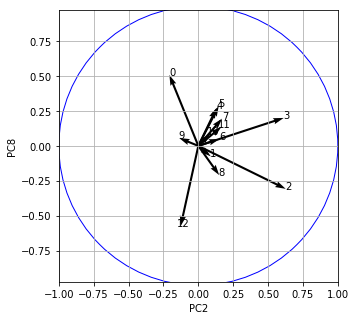

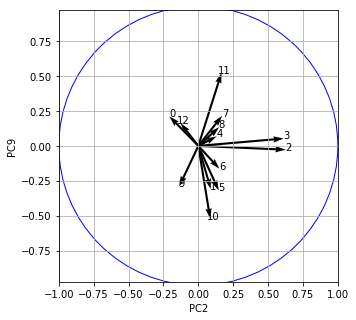

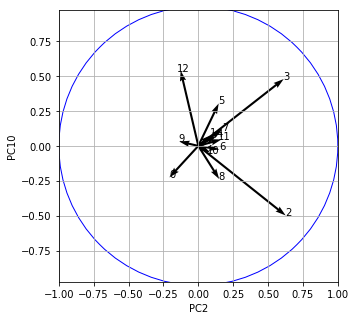

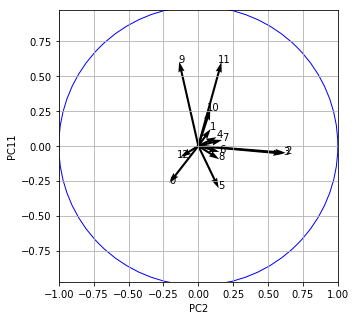

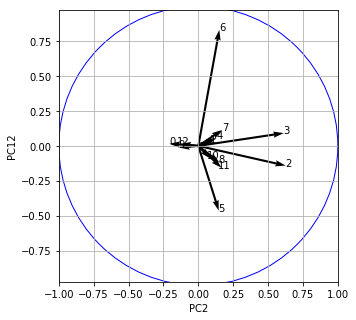

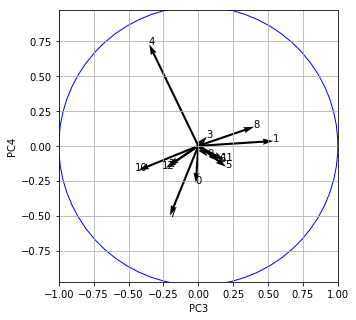

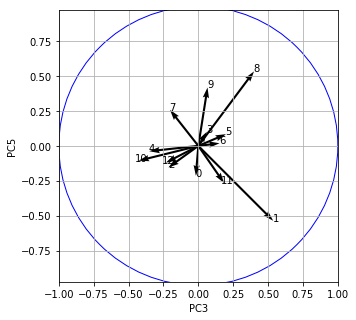

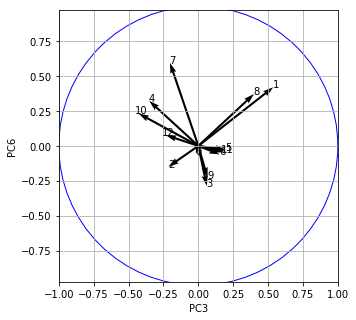

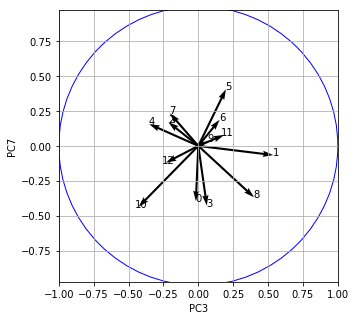

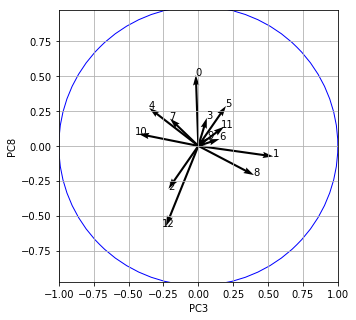

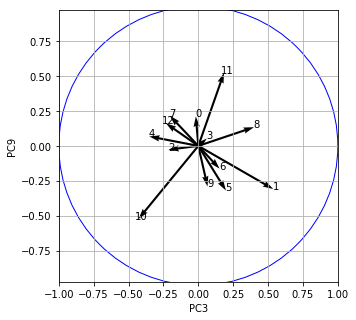

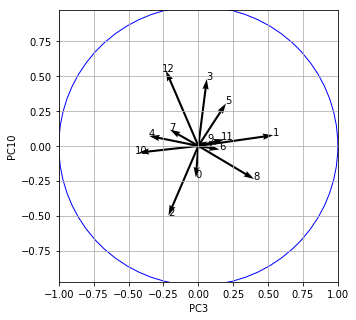

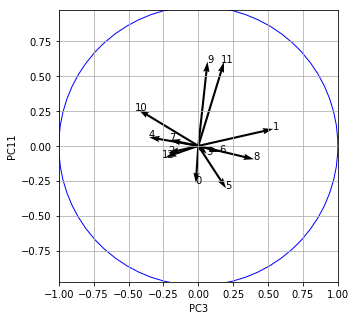

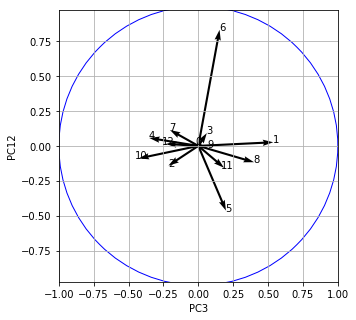

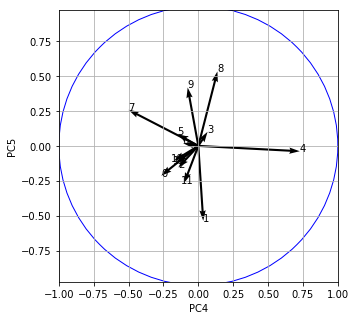

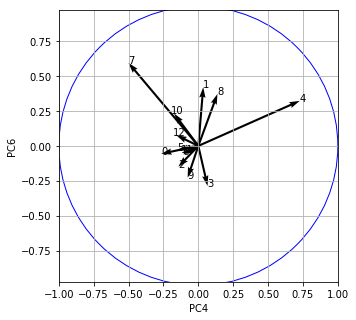

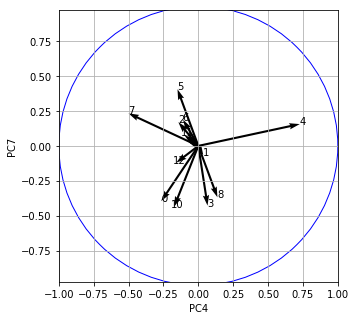

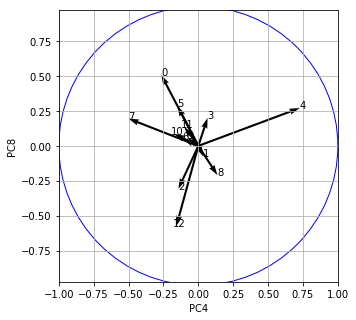

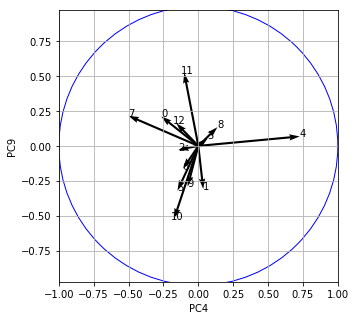

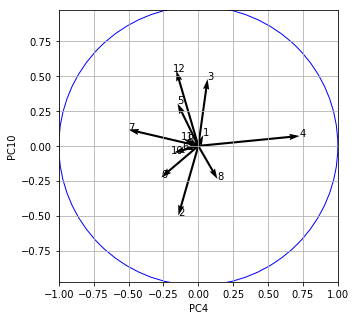

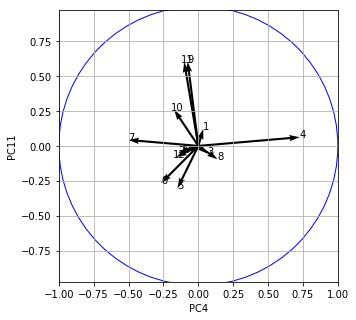

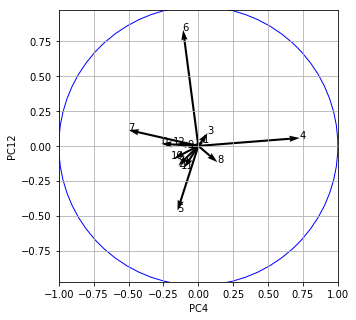

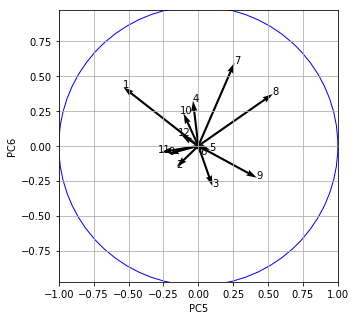

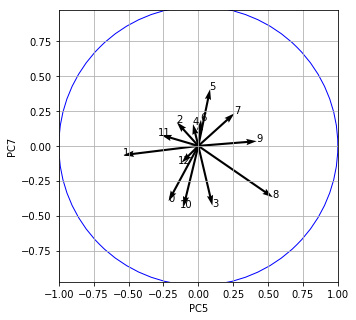

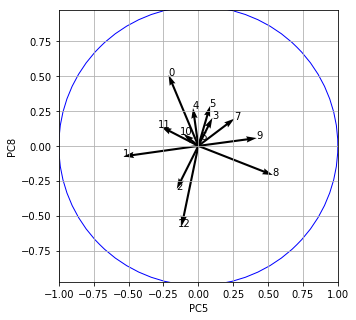

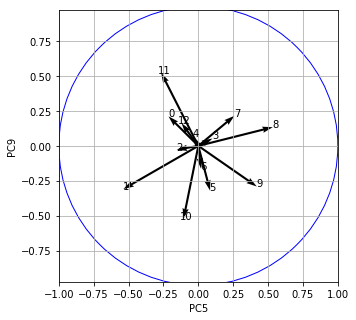

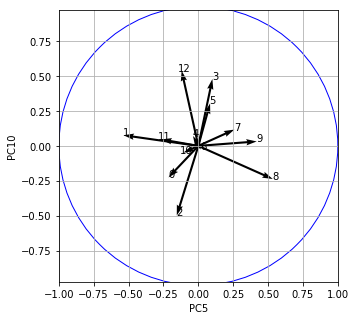

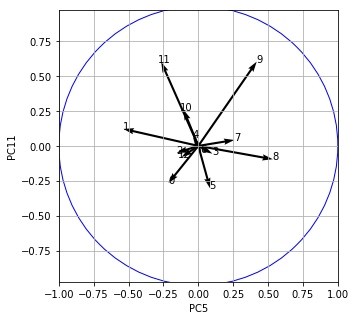

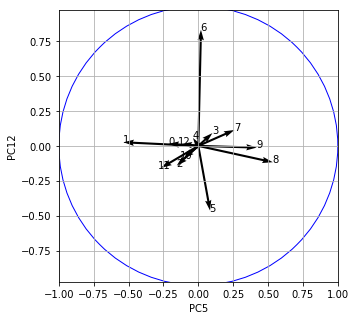

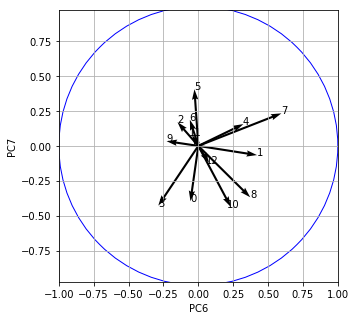

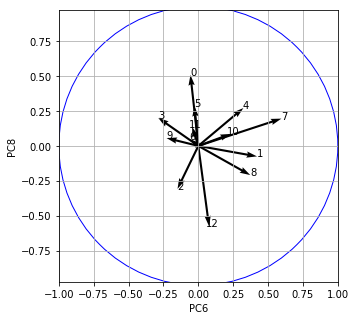

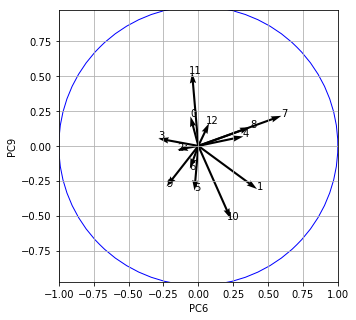

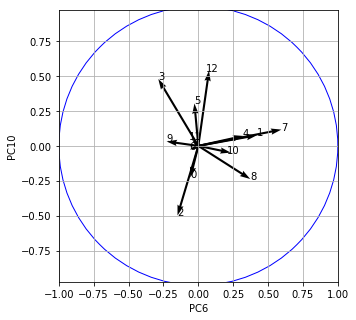

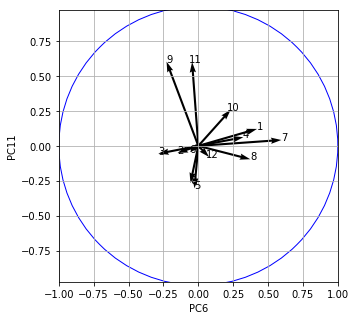

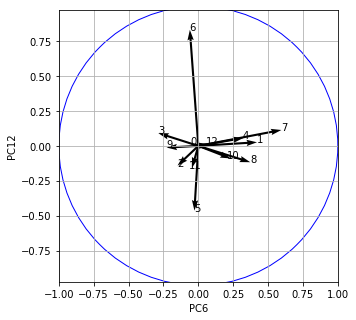

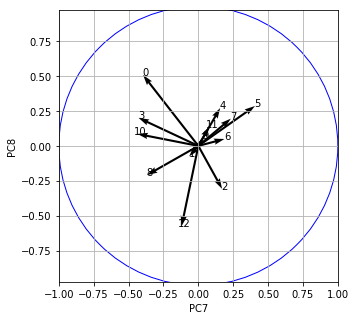

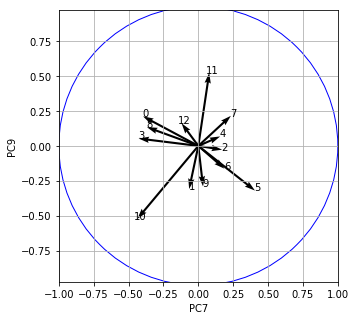

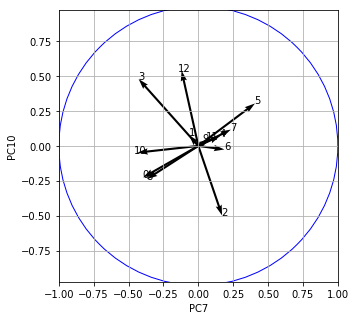

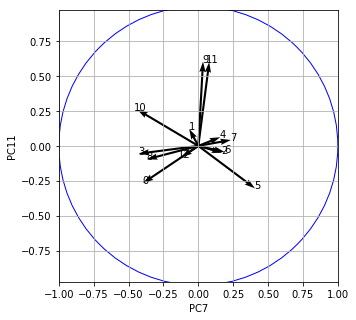

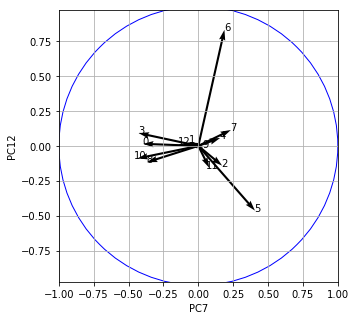

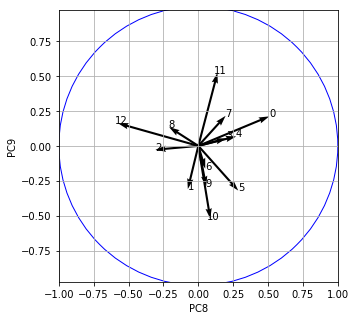

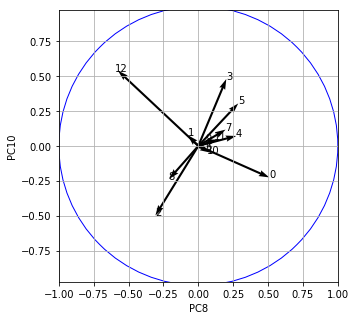

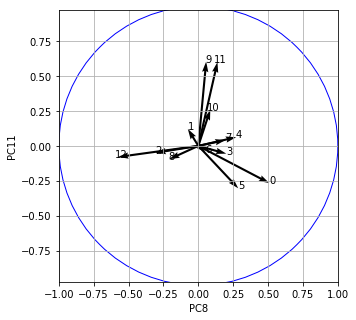

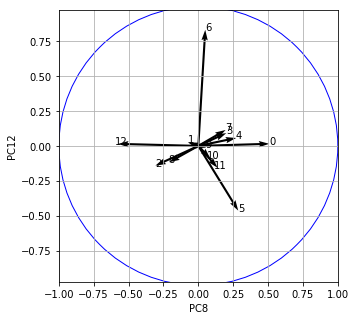

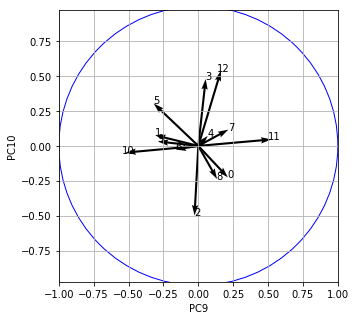

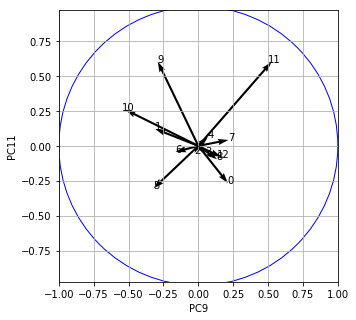

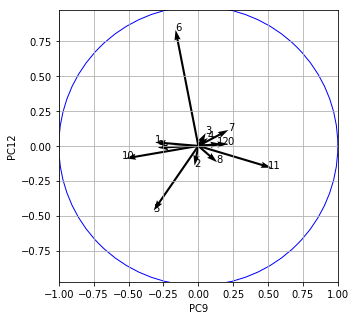

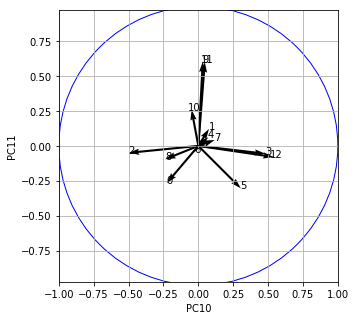

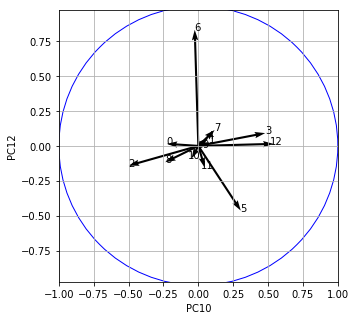

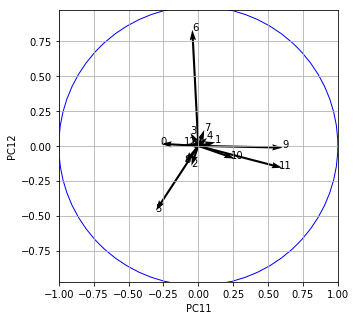

In [24]:
circle_correlations_1(wine_s)

In [18]:
##this is the function with 3x3 subplots

def circle_correlation_2(data):
    #drop what needed, hoping to receive only not categorical and dummy variables,with no nan and already standardized
    ## this way i can perform the PCA correctly .
    
    ##from sklearn.preprocessing import StandardScaler
    
    ##data.dropna(how="all",inplace=True)
    ##data2=data.iloc[:,0:13]
    ##data3= StandardScaler().fit_transform(data2)
    ## these are the standars operations we have to do in order to perform PCA
    
    pca = PCA().fit(data)
    pcs2 = pca.components_
    ##n_rv=X.shape[1]
    
    fig = plt.figure()
    m=0
    
    for h in range(len(pcs2)):
        for k in range(len(pcs2)):
           
            if k<h:
                #i will fill only the lower diagonal
                m+=1
                
                
                if m==10:
                    plt.show()
                    m=1
                    fig = plt.figure()
                    
                plt.subplot(3,3,m)
                plt.quiver(np.zeros(pcs2.shape[1]), np.zeros(pcs2.shape[1]),
                           pcs2[h,:], pcs2[k,:], 
                           angles='xy', scale_units='xy', scale=1)
                
                # Add labels based on feature names (here just numbers)
                feature_names = np.arange(pcs2.shape[1])
                for i,j,z in zip(pcs2[k,:]+0.02, pcs2[h,:]+0.02, feature_names):
                    plt.text(j, i, z, ha='center', va='center')
                
                # Add unit circle
                circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
                plt.gca().add_artist(circle)
                
                # Ensure correct aspect ratio and axis limits
                plt.axis('equal')
                plt.xlim([-1.0,1.0])
                plt.ylim([-1.0,1.0])
                
                # Label axes
                plt.xlabel('PC'+str(h))
                plt.ylabel('PC'+str(k))
                plt.grid()
                
                # Done
    
    plt.show() #plot the remaining stuff
                                
    print(len(pcs2))

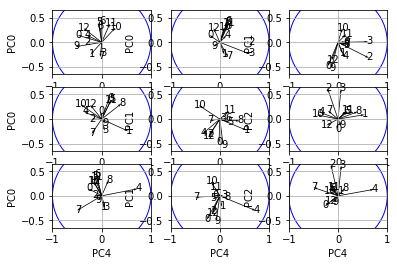

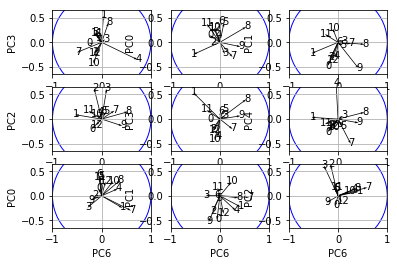

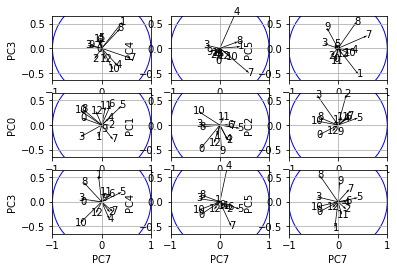

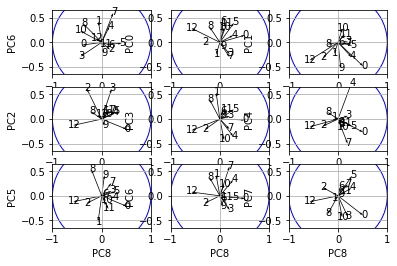

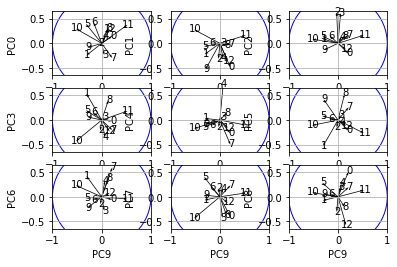

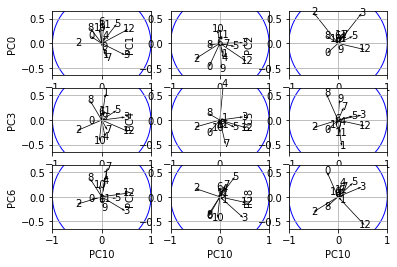

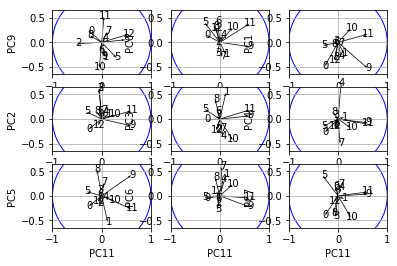

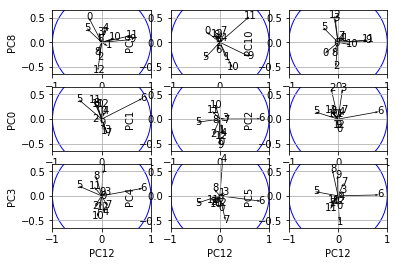

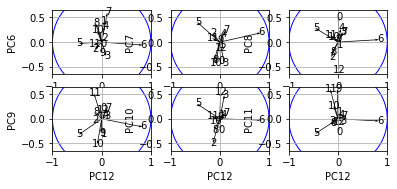

13


In [19]:
circle_correlation_2(wine_s)